In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
import pandas as pd
from astropy import units as u
from astropy import cosmology
import astropy.coordinates as coord

In [3]:
cosmo = cosmology.FlatLambdaCDM(70.,0.3)

In [4]:
plt.rcParams['font.size'] = 13
dstep = 5
ra_bins = np.arange(-180,181,dstep)
dec_bins = np.arange(-90,91,dstep)

In [5]:
RAg,DECg = np.meshgrid(np.deg2rad(ra_bins),np.deg2rad(dec_bins))

In [6]:
rstep = np.deg2rad(dstep)

# \\ build dA grid 
agrid = np.zeros_like(RAg.T)
for i in range(RAg.shape[1]):
    for j in range(RAg.shape[0]):
        dA = abs(rstep * (np.sin(DECg[j,i]+rstep) - np.sin(DECg[j,i])))
        agrid[i,j] = dA

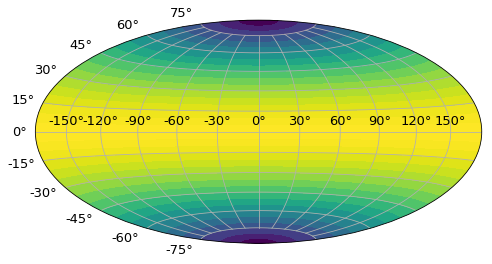

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="hammer")
ax.pcolormesh ( RAg,DECg, agrid.T, cmap='viridis')
ax.grid ()

In [8]:
def plot_footprint (footprint, dmin,dmax, color='tab:red'):
    u, v = RAg+np.pi,DECg+np.pi/2.
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)

    cmap = colors.LinearSegmentedColormap.from_list ('', [color,color], 4)
    m = plt.cm.ScalarMappable(cmap=cmap)
    m.set_array([])
    for dm in [dmin,dmax]:
        fcolors = m.to_rgba(footprint,)
        fcolors[footprint==0,-1] = 0.
        fcolors[footprint==1,-1] = 0.3
        
        ax.plot_surface(dm*x, dm*y, dm*z, facecolors=fcolors, )
    
    if (footprint==1).all():
        _u = np.linspace(0,np.pi*2, 10)
        _v = np.linspace(0.,np.pi,10)
        U,V = np.meshgrid(_u,_v)
        u = U.flatten()
        v = V.flatten()
    else:
        #outline = footprint - ndimage.binary_erosion ( footprint ).astype(int)
        #yd,xd=np.where(outline>0)    
        u,v = RAg[footprint>0].flatten()+np.pi+5./180.*np.pi,DECg[footprint>0].flatten()+np.pi/2.
        step = max(u.size // 60,1)
        u = u[::step]
        v = v[::step]
        #u,v=np.deg2rad(ra_bins[xd]+5.)+np.pi, np.deg2rad(dec_bins[yd])+np.pi/2.
        
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)

    for dm in np.arange(dmin,dmax,.08):
        ax.scatter(dm*x,dm*y,dm*z, color=color, s=1)    


In [9]:
plt.rcParams['font.size'] = 20

In [10]:
conv = (u.sr).to(u.deg**2)

In [11]:
import os
import glob

In [12]:
filenames = glob.glob('../data/footprints/*npy') 
surveynames =  [ os.path.basename(x).split('_')[0] for x in filenames ]

In [13]:
footprints = [ np.load(fname) for fname in filenames ] 

In [14]:
wigglez = np.max(footprints[-7:],axis=0)
surveynames = surveynames[:-7] + ['wigglez']
footprints = footprints[:-7] + [wigglez]

/Users/kadofong/env3/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/kadofong/env3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'interpolation'
  s)


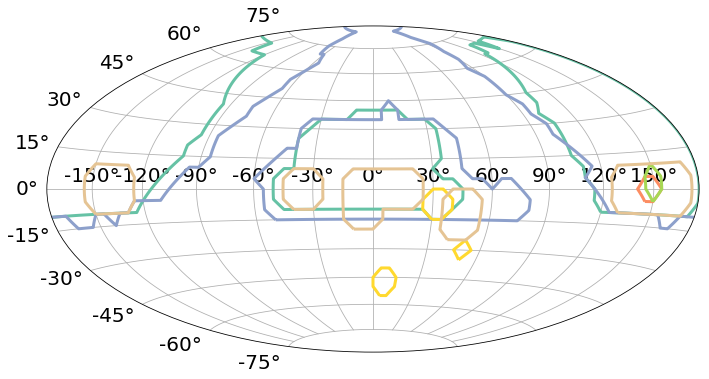

In [15]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection="hammer")

for ix,ft in enumerate(footprints):
    color = plt.cm.Set2 ( ix / len(footprints) )
    #cmap = colors.LinearSegmentedColormap.from_list('',[[0.,0.,0.,0.],color], 3)
    #ax.pcolormesh ( RAg,DECg, ft.T, cmap=cmap)
    cmap = colors.LinearSegmentedColormap.from_list('',[color,color], 3)
    ax.contour ( RAg,DECg, ft.T, cmap=cmap, levels=3, linewidths=3, interpolation=None)
ax.grid ()

In [16]:
zlims = pd.read_csv('../data/footprints/redshift_limits.txt')

In [17]:
zlims.loc[11] = zlims.loc[10]
zlims.loc[12] = zlims.loc[9]

In [18]:
zlims

,survey,z05,z10,z50,z90,z95
0,DESI LRGs,0.6,0.700,0.800,1.000,1.1
1,DESI QSOs,0.4,0.600,1.600,2.800,3.5
2,WIGGLEZ,NaN,0.220,0.630,1.010,NaN
3,SPHEREx (\sigma_z/(1+z)= 0 - 0.003),0.2,0.200,0.400,0.600,0.8
4,SPHEREx (\sigma_z/(1+z)= 0.003 - 0.01),0.2,0.400,0.600,0.800,1.0
5,SPHEREx (\sigma_z/(1+z)= 0.01 - 0.03),0.2,0.400,0.600,1.000,1.0
6,SPHEREx (\sigma_z/(1+z)= 0.03 - 0.1),0.2,0.400,0.800,1.000,1.6
7,SPHEREx (\sigma_z/(1+z)= 0.1 - 0.2),0.2,0.400,0.800,1.600,1.6
8,SPHEREx (all samples combined),0.2,0.400,0.600,1.000,1.6
9,BOSS,0.198,0.270,0.504,0.642,0.685


In [19]:
zlims['standard_survey'] = ''
zlims.loc[[9,10,0,8,11,12,2], 'standard_survey'] = surveynames

In [20]:
zlims

,survey,z05,z10,z50,z90,z95,standard_survey
0,DESI LRGs,0.6,0.700,0.800,1.000,1.1,DESI
1,DESI QSOs,0.4,0.600,1.600,2.800,3.5,
2,WIGGLEZ,NaN,0.220,0.630,1.010,NaN,wigglez
3,SPHEREx (\sigma_z/(1+z)= 0 - 0.003),0.2,0.200,0.400,0.600,0.8,
4,SPHEREx (\sigma_z/(1+z)= 0.003 - 0.01),0.2,0.400,0.600,0.800,1.0,
5,SPHEREx (\sigma_z/(1+z)= 0.01 - 0.03),0.2,0.400,0.600,1.000,1.0,
6,SPHEREx (\sigma_z/(1+z)= 0.03 - 0.1),0.2,0.400,0.800,1.000,1.6,
7,SPHEREx (\sigma_z/(1+z)= 0.1 - 0.2),0.2,0.400,0.800,1.600,1.6,
8,SPHEREx (all samples combined),0.2,0.400,0.600,1.000,1.6,SPHEREx
9,BOSS,0.198,0.270,0.504,0.642,0.685,BOSSDR9


In [21]:
f_zlims = zlims.loc[zlims['standard_survey']!=''].set_index('standard_survey')

In [22]:
extras = pd.DataFrame(columns=['area','zmin','zmax'])
extras.loc['Euclid'] = [1.4e4, 0., 2.] # https://www.euclid-ec.org/?page_id=2520
extras.loc['DES BGS'] = [15000.,0.05, 0.4]
extras.loc['RST'] = [2000., 1.1, 2.8]

Text(0,0.5,'area covered (deg$^2$)')

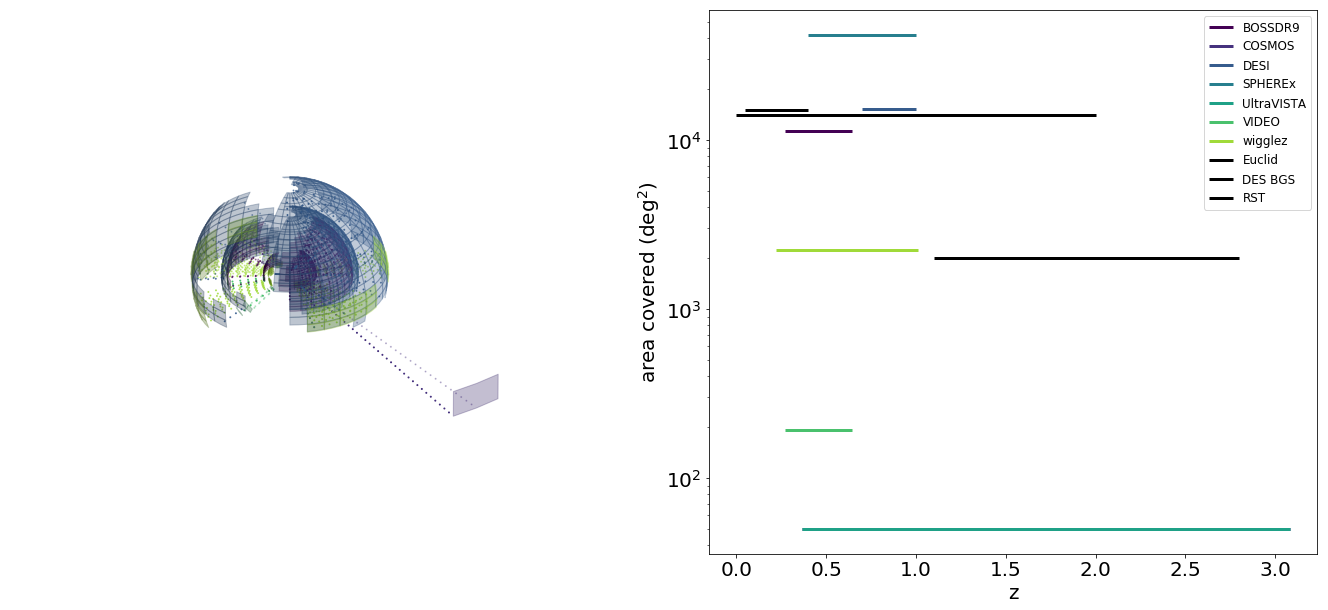

In [27]:
fig = plt.figure(figsize=(24,10))

ax = plt.subplot(121, projection='3d', aspect='equal')

#ax = Axes3D(fig) 
#ax = fig.gca(projection='3d', aspect='equal')
ax.set_aspect("equal")

for i,(name, footprint) in enumerate(zip(surveynames, footprints,)):
    if name=='SPHEREx' or name=='UltraVISTA':
        continue
    zlim = f_zlims.loc[name]
    plot_footprint ( footprint.T, zlim.z10, zlim.z90, plt.cm.viridis(i/len(surveynames)) )

lim = 1.5
ax.set_xlim3d(-lim,lim)
ax.set_ylim3d(-lim,lim)
ax.set_zlim3d(lim,-lim)
#ax.view_init(10., 90.)
ax.set_xlabel ('x (Mpc)')
ax.set_ylabel ('y (Mpc)')
ax.set_zlabel ('z (Mpc)')
plt.axis('off')
plt.grid(b=None)


ax1 = plt.subplot(122)

for i,(name, footprint) in enumerate(zip(surveynames, footprints)):
    zlim = f_zlims.loc[name]
    ax1.hlines ( conv*agrid[footprint>0].sum(), zlim.z10, zlim.z90, color=plt.cm.viridis(i/len(surveynames)), lw=3,
               label=name)
    
for name, row in extras.iterrows():
    ax1.hlines ( row['area'], row['zmin'], row['zmax'], lw=3, label=name)
    
ax1.legend(fontsize=12)
ax1.set_yscale('log')
ax1.set_xlabel ( 'z' )
ax1.set_ylabel (r'area covered (deg$^2$)')

Text(0.5,0,'z (Mpc)')

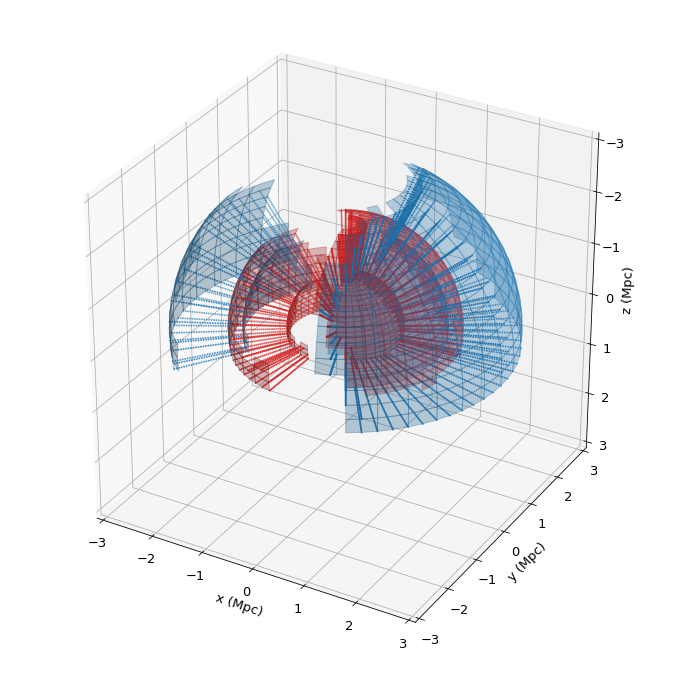

In [291]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d', aspect='equal')
ax.set_aspect("equal")




    
u, v = RAg+np.pi,DECg+np.pi/2.
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)    
    
cmap = colors.LinearSegmentedColormap.from_list ('', ['w','tab:blue'], 2)
m = plt.cm.ScalarMappable(cmap=cmap)
m.set_array([])
for dmax in [1.75,3.]:
    fcolors = m.to_rgba(boss.T)
    fcolors[boss.T==0,-1] = 0.
    fcolors[boss.T==1,-1] = 0.3
    ax.plot_surface(dmax*x, dmax*y, dmax*z, facecolors=fcolors, ) 

outline = boss.T - ndimage.binary_erosion ( boss.T).astype(int)
yd,xd=np.where(outline>0)    
    
u,v=np.deg2rad(ra_bins[xd]+5.)+np.pi, np.deg2rad(dec_bins[yd])+np.pi/2.
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

for dmax in np.linspace(1.75,3.,30):
    ax.scatter(dmax*x,dmax*y,dmax*z, color='tab:blue', s=1)
    

lim = 3
ax.set_xlim3d(-lim,lim)
ax.set_ylim3d(-lim,lim)
ax.set_zlim3d(lim,-lim)
#ax.view_init(10., 90.)
ax.set_xlabel ('x (Mpc)')
ax.set_ylabel ('y (Mpc)')
ax.set_zlabel ('z (Mpc)')

In [30]:
zgrid = np.arange(0.,10.01, .1)

In [117]:
mwr = np.genfromtxt('../data/optnir-surveys/maglims/mw_sdss-r_mag.dat')
dwr = np.genfromtxt('../data/optnir-surveys/maglims/dwarf_sdss-r_mag.dat')
elr = np.genfromtxt('../data/optnir-surveys/maglims/ell_sdss-r_mag.dat')

In [47]:
zmax_bgs = np.interp(19.5, mwr, zgrid)
zmax_lrg = 1.45 # highest z at which 4000A break is in DESI 

In [119]:
zmax_mwr = np.interp(19.5, mwr, zgrid)
zmax_elr = np.interp(19.5, elr, zgrid)
zmax_dwr = np.interp(19.5, dwr, zgrid)
zmax_l = [zmax_dwr, zmax_mwr, zmax_elr]

In [120]:
dmax_l = []
for z in zmax_l:
    dmax_l.append(cosmo.comoving_distance(z).value)

In [163]:
colors_l = ['C0','tab:green','tab:red', 'darkred']

In [164]:
from matplotlib import colors

In [452]:
import matplotlib

Text(0.5,0,'z (Mpc)')

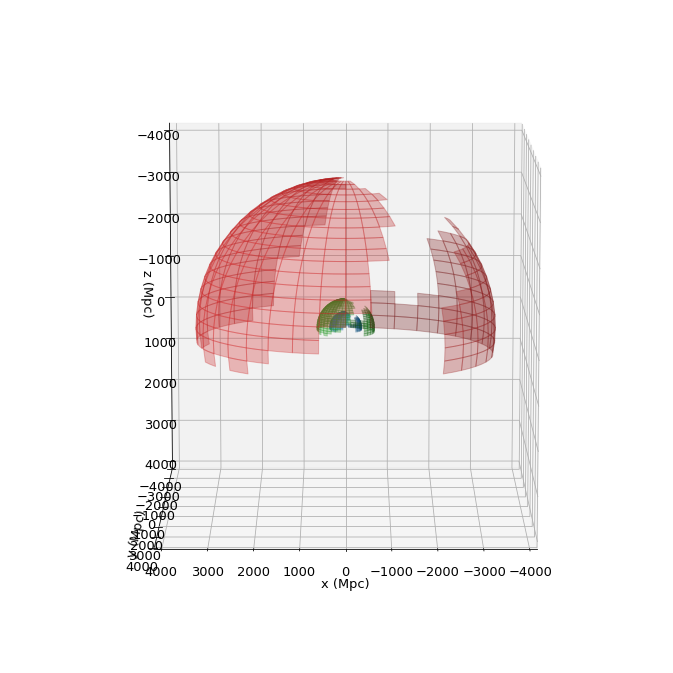

In [162]:

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d', aspect='equal')
ax.set_aspect("equal")


u, v = RAg+np.pi,DECg+np.pi/2.
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
for cc,dmax in zip(colors_l,dmax_l):
    cmap = colors.LinearSegmentedColormap.from_list ('', ['w',cc], 2)
    m = plt.cm.ScalarMappable(cmap=cmap)
    m.set_array([])
    fcolors = m.to_rgba(desi.T)
    fcolors[desi.T==0,-1] = 0.
    fcolors[desi.T==1,-1] = 0.3
    ax.plot_surface(dmax*x, dmax*y, dmax*z, facecolors=fcolors, )

lim = 4000
ax.set_xlim3d(-lim,lim)
ax.set_ylim3d(-lim,lim)
ax.set_zlim3d(lim,-lim)
ax.view_init(10., 90.)
ax.set_xlabel ('x (Mpc)')
ax.set_ylabel ('y (Mpc)')
ax.set_zlabel ('z (Mpc)')

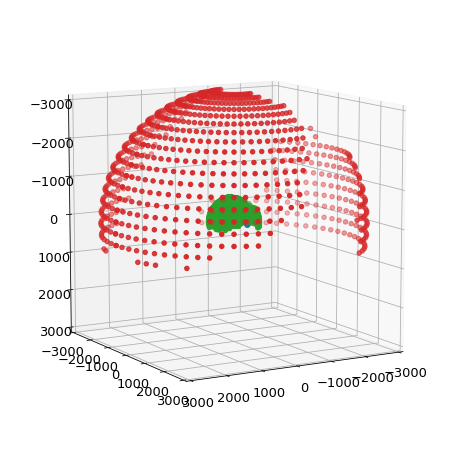

In [137]:

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d', aspect='equal')
ax.set_aspect("equal")

# draw sphere
# u, v <= phi, theta
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
pos = np.array([x,y,z])
#ax.plot_surface(*(dmax_lrg*pos), color="None", edgecolor="r", linewidth=0.5,zorder=0)


u, v = RAg+np.pi,DECg+np.pi/2.
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

for cc,dmax in zip(colors_l,dmax_l):
    ax.scatter(dmax*x[desi.T>0], dmax*y[desi.T>0], dmax*z[desi.T>0], color=cc)

#ax.plot([0,dmax_lrg*x[desi.T>0][0]], [0,dmax_lrg*y[desi.T>0][0]], [0,dmax_lrg*z[desi.T>0][0]], color='k', zorder=10)

lim = 3000
ax.set_xlim3d(-lim,lim)
ax.set_ylim3d(-lim,lim)
ax.set_zlim3d(lim,-lim)
ax.view_init(10., 60.)

In [133]:
cosmos = open('/Users/kadofong/Downloads/cosmos2015_zphot.dat','r').read().splitlines()[42:]
cosmos = np.asarray(list(filter(None,cosmos)), dtype=float)

In [137]:
','.join(np.around(np.nanquantile(cosmos[cosmos>0.], [.05,.1,.5,.9,.95]), 3).astype(str))

'0.251,0.365,1.216,3.081,3.646'

array([1.908, 0.382, 0.555, ..., 1.306, 0.859, 2.128])

In [86]:
boss = pd.read_csv('/Users/kadofong/Downloads/spAll-DR12.dat', delim_whitespace=True )

/Users/kadofong/env3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,12,13,15,16,17,18,19,20,21,22,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
boss = boss.iloc[1:]

In [102]:
xx = np.quantile(boss.loc[(boss['CLASS']=='GALAXY')&(boss['ZWARNING']==0),'Z'].astype(float),[.05,.1,.5,.9,.95])

In [105]:
','.join(np.around(xx,3).astype(str))

'0.198,0.27,0.504,0.642,0.685'